# Jupyter notebook tips

In [15]:
import time
from IPython.display import HTML
from numpy.random import randint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm_notebook as tqdm
import pickle

1. Basics
2. Magic commands
3. [Navigation links](#NavigationLink)
4. Hiding code cells
5. Other useful tricks

## 1. Basics

We will cover some basics of using Jupyter notebooks:

- code cell vs markdown cells
- basic formatting (headers, bold, italics, bullets, tables, comment block of code etc.)

## 2. Magic commands

IPython has some additional commands on top of Python syntax. Lots of these so called 'magic commands' are very useful.

- Magic commands that operate on one line of code start with %
- Magic commands that operate on the whole cell start with %%

There are so many magic commands so we will just cover some of the common ones. Follow this link for comprehensive list.
https://ipython.readthedocs.io/en/stable/interactive/magics.html


### %%time
Time taken to run line / cell block

In [4]:
%time time.sleep(5)

Wall time: 5.02 s


In [3]:
%%time

time.sleep(5)

Wall time: 5.01 s


### %%timeit

Runs code block multiple times, and takes average time taken to give more robust estimate of time taken.

In [6]:
%%timeit

L = []

for n in range(1000):
   L.append(n ** 2)

795 µs ± 134 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
%timeit L = [n ** 2 for n in range(1000)]

683 µs ± 88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### %%run

Run python scripts

In [26]:
%run hello_world.py

hello world!


### %matplotlib inline

Displays plots below code cell.

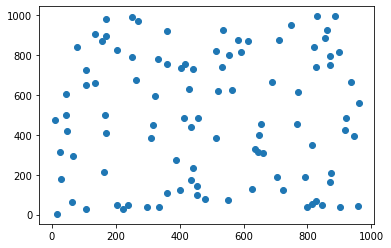

In [9]:
# Sample 1000 random values to create a scatterplot
x = randint(low=1, high=1000, size=100)
y = randint(low=1, high=1000, size=100)

# This will show nothing in a Jupyter Notebook
#%matplotlib auto
plt.scatter(x, y)
plt.show()

# Let the magic happen!
# %matplotlib inline
# plt.scatter(x, y)
# plt.show()

## 3. Navigation links <a id='NavigationLink'></a>

You can create navigation links in Jupyter notebooks, using some html. This is useful for long notebooks.

## 4.Hiding code cells

Sometimes we want to hide the code cells in a notebook. This is useful if you want to use the notebook as documentation etc.

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<font color=blue>Click toggle <a href="javascript:code_toggle()">here</a> to show and hide code cells in this notebook.</font>''')

## 5. Other useful tricks

- widgets
- tqdm
- pickle

### Widgets

In [6]:
selection = widgets.Dropdown(
    options=['Choice 1', 'Choice 2', 'Choice 3'],
    value='Choice 1',
    description='Selection',
    disabled=False,
)

slider = widgets.IntSlider(
    min=1,
    max=10,
    step=1,
    description='Slider:',
    value=5
)

display(selection)
display(slider)

Dropdown(description='Selection', options=('Choice 1', 'Choice 2', 'Choice 3'), value='Choice 1')

IntSlider(value=5, description='Slider:', max=10, min=1)

In [27]:
print("Selection value is:",selection.value)
print("Slider value is:",slider.value)

Selection value is: Choice 3
Slider value is: 9


### tqdm

Displays a progress bar for any iterable, as well as integration with panda for apply.

In [28]:
my_list = list(range(30000000))
for x in tqdm(my_list):
    pass

In [29]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm  # for notebooks

df = pd.DataFrame(np.random.randint(0, int(10000), (100, 100)))

# Create and register a new `tqdm` instance with `pandas`
tqdm.pandas()

df.groupby(0).progress_apply(lambda x: x**2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,48038761,41512249,21141604,5508409,44116164,75864100,1156,80496784,41938576,198916,...,12666481,32761,624100,68145025,11923209,12152196,87759424,16793604,38316100,92794689
1,62678889,7209225,77951241,32581264,22184100,2765569,57093136,24068836,553536,99161764,...,39513796,55234624,60746436,20169081,7252249,91489225,46881409,88887184,94381225,78960996
2,75076,25300900,59351616,19386409,15437041,5107600,72897444,1562500,53890281,4473225,...,1138489,26574025,59074596,48399849,67207204,93334921,34969,38378025,25573249,81793936
3,28164249,21594609,3268864,80640400,21132409,30140100,50651689,48650625,28590409,40998409,...,46662561,11015761,22629049,78925456,52504516,471969,83375161,106929,206116,2637376
4,66308449,30591961,60264169,12341169,41486481,17690436,7823209,59290000,1044484,497025,...,68079001,89927289,14379264,69572281,77387209,1819801,2280100,2253001,96373489,23299929
5,32080896,29289744,41679936,71267364,68939809,18550249,535824,3345241,837225,87740689,...,78304801,22024249,38663524,30041361,25583364,53450721,86304100,19395216,37822500,1390041
6,31136400,9504889,8410000,66618244,9579025,10169721,92198404,65028096,11664,7360369,...,43388569,55875625,13184161,88736400,62331025,427716,83046769,41654116,1582564,41899729
7,553536,15856324,4946176,82944,38750625,46840336,5166529,55785961,83338641,56250000,...,9480241,63792169,6241,92313664,26532801,23251684,84971524,28090000,13601344,90231001
8,54789604,447561,7840000,17682025,89624089,47403225,74978281,685584,73188025,20557156,...,34339600,52287361,2102500,86992929,9511056,1214404,55145476,2965284,12313081,454276
9,3066001,8468100,48525156,42341049,2090916,72267001,14592400,67519089,38167684,10407076,...,64256256,39614436,67125249,147456,93586276,23474025,3759721,22600516,3218436,94692361


### pickle

Pickle is a way to serialise Python objects. It allows you to write and read in Python objects (much faster than writing and reading csv).

In [16]:
with open('df.pickle', 'wb') as pickle_file:
    pickle.dump(df, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
with open('df.pickle', 'rb') as pickle_file:
    df1 = pickle.load(pickle_file)

Pandas also directly supports pickling

In [20]:
df.to_pickle('df_pandas.pickle')

In [22]:
df = pd.read_pickle('df_pandas.pickle')

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,687,9302,1588,1168,3303,2132,4179,1382,9128,4508,...,2475,5977,9884,5272,9465,6302,7210,7911,6893,9284
1,6815,3417,7712,3184,2042,7312,3382,4458,3395,6219,...,7030,3590,7363,9906,6284,5886,3761,6956,2211,5280
2,6622,1510,9215,7197,8196,2875,4890,8398,7120,8988,...,186,2475,6606,4226,8951,2488,2229,5232,807,1078
3,1079,76,9961,1724,4574,9852,8916,6090,7341,8709,...,5156,5203,3087,5387,4434,5269,8424,3185,3841,5407
4,730,4650,4162,3069,7666,8952,8112,9721,3813,1381,...,8468,5823,5612,6502,1705,8579,7006,3907,596,3940
5,9339,7739,269,567,8773,531,7430,3770,7783,4132,...,3890,8586,3747,1563,6677,2209,597,3745,9351,6292
6,8674,7273,1738,1437,4545,2170,9681,1017,155,358,...,3346,8487,5457,9902,6017,5524,7022,6261,2110,8132
7,9168,545,995,3601,7751,7064,3293,9352,5014,1532,...,1086,4451,8196,2266,8194,8162,9502,1885,5413,3826
8,7897,3290,8399,6298,4840,6684,6586,2628,9145,5316,...,4102,8149,6524,5109,7560,2241,7933,961,9927,2773
9,901,2178,915,9094,2646,7753,4005,2977,6107,9586,...,5258,1535,6098,1115,8028,5868,1190,7866,6115,1556
